In [ ]:
#"Decomment for install"
#!pip install kmeans
#!pip install seaborn

In [4]:
#Modules to install via pip pandas,ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pprint import pprint
import os
import import_ipynb
import sys
import kmeans
sys.path.append('../')
from functions import *
from pandas.plotting import scatter_matrix
import cmath as math
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
# scipy
from scipy.cluster.vq import kmeans,vq,whiten
import sklearn.metrics as sm
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
import random
random.seed(6666)

In [194]:

dataList=coojaJsonImporter("./traces")
data=[]
cases=[
      "BH1",
        "BH2",
    "normal"
      ]

BlackHole=[-1,4,5+8]
for nodeList in dataList:
    data.append(createNodes(nodeList))

#All data collection is in variable node that is a list of list of nodes
#3 nets input x 9 nodes by net
data[0][0].pkts[1:5] 

d={ "label":[],
    "count":[],
    "std":  [],
    "mean": [],
    "var":  [],
    "25%":  [],
   "50%":[],
   "75%":[],
   "min":[],
   "max":[],
   "hop":[],
   "missing": []
   #"rtt/pkt":[]
}
count=[]
labels=[]
var=[]
window=100
#stats=pd.DataFrame(columns=columns)
rows=[count,labels]
for i in range(len(data)):
    for j in range(len(data[i])):
            #df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
            node=data[i][j].pkts
            name=str(j)+" "+cases[i]
            nodeWindow=node["rtt"]
            #current=data[i][j].pkts['rtt'][z:z+window]
            #print(nodeWindow.shape)
            d["count"].append(nodeWindow.count())
            d["std"].append(nodeWindow.std())
            d["mean"].append(nodeWindow.mean())
            d["var"].append(nodeWindow.var())
            d["label"].append(cases[i])
            #print(nodeWindow.describe()["25%"])
            d["25%"].append(nodeWindow.describe()["25%"])
            d["50%"].append(nodeWindow.describe()["50%"])
            d["75%"].append(nodeWindow.describe()["75%"])
            d["min"].append(nodeWindow.describe()["min"])
            d["max"].append(nodeWindow.describe()["max"])
            d["hop"].append(data[i][j].hop)
            
            missing=window-nodeWindow.count()
            d["missing"].append(missing)

            
            
stats=pd.DataFrame(d)            

stats
correction=[]
correction2=[] #for 3 cluster 0:normal net 1:bh net 2:bh
correction3=[] #for 3 cluster 0:normal net 1:bh net 2:bh net
for i in range(len(d["label"])):
    el=d["label"][i]
    if el=="normal":
        correction.append(1)
        correction2.append(1)
        
    else:
        #print(el=="BH2" and i==BlackHole[2])
        correction.append(0)
        if ((el=="BH1" and i==BlackHole[1]) or
            (el=="BH2" and i==BlackHole[2])):
            
            correction2.append(2)
        else:
            correction2.append(0)
        

correction=np.array(correction)
correction2=np.array(correction2)

stats.head()


Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json


,label,count,std,mean,var,25%,50%,75%,min,max,hop,missing
0,BH1,98,1403.775442,1868.816327,1.970585e+06,1035.75,1404.5,1883.75,498.0,8170.0,1,2
1,BH1,99,1812.662114,2139.282828,3.285744e+06,1094.00,1430.0,2435.50,615.0,9112.0,1,1
2,BH1,91,1873.889033,3916.604396,3.511460e+06,2471.00,3067.0,4722.00,1236.0,9972.0,2,9
3,BH1,97,1308.893667,1815.742268,1.713203e+06,1035.00,1313.0,2029.00,258.0,6985.0,1,3
4,BH1,25,2220.932875,4667.000000,4.932543e+06,3024.00,3943.0,6051.00,2004.0,9803.0,3,75


In [220]:
data=stats.drop(["label","25%","var","mean","75%","50%","min","max"],axis=1)

dataC=stats["label"]
print(data.head())
#Y = data[['var']]
#X = data[['std']]



   count          std  hop  missing
0     98  1403.775442    1        2
1     99  1812.662114    1        1
2     91  1873.889033    2        9
3     97  1308.893667    1        3
4     25  2220.932875    3       75


Kmeans with 2 clusters, using just count, mean and hop feature we can get 85% of understanding probability


In [221]:
data.head()

,count,std,hop,missing
0,98,1403.775442,1,2
1,99,1812.662114,1,1
2,91,1873.889033,2,9
3,97,1308.893667,1,3
4,25,2220.932875,3,75


In [222]:

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_


print(labels)
print(correction)

# Performance Metrics
accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(accuracy)
print(confusionMatrix)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
1.0
[[18  0]
 [ 0  9]]


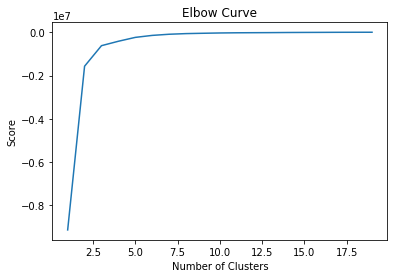

In [223]:
Y=data
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()


In [215]:
dataplus=stats.drop(["label"],axis=1)
data=dataplus
data.head()

,count,std,mean,var,25%,50%,75%,min,max,hop,missing
0,98,1403.775442,1868.816327,1.970585e+06,1035.75,1404.5,1883.75,498.0,8170.0,1,2
1,99,1812.662114,2139.282828,3.285744e+06,1094.00,1430.0,2435.50,615.0,9112.0,1,1
2,91,1873.889033,3916.604396,3.511460e+06,2471.00,3067.0,4722.00,1236.0,9972.0,2,9
3,97,1308.893667,1815.742268,1.713203e+06,1035.00,1313.0,2029.00,258.0,6985.0,1,3
4,25,2220.932875,4667.000000,4.932543e+06,3024.00,3943.0,6051.00,2004.0,9803.0,3,75


In [217]:



kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_


print(labels)
print(correction)

# Performance Metrics
accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(accuracy)
print(confusionMatrix)




[0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
0.14814814814814814
[[ 4 14]
 [ 9  0]]


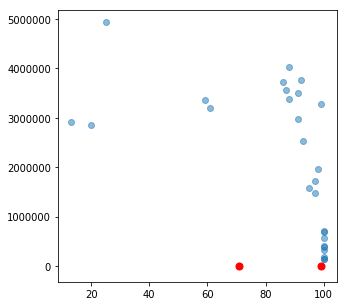

In [207]:
fig = plt.figure(figsize=(5, 5))

colors = map(lambda x: colmap[x+1], labels)


plt.scatter(data['count'], data['var'], alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

plt.show()

In [ ]:
#https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/
#df=np.array(X,Y)




In [303]:


X = dataplus.iloc[:,0:4]
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()

,x1,x2,labels
0,-1.906469e+05,1109.374349,BH1
1,1.124512e+06,1558.013436,BH1
2,1.350229e+06,-95.831043,BH1
3,-4.480298e+05,1021.728477,BH1
4,2.771312e+06,-69.901685,BH1


In [ ]:

labels = stats['label'].unique().tolist()
plt.figure(figsize=(7,5))
for lab in labels:
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab)
    plt.legend()

Experiment with 3 clusters trying also to find the black Hole node, 0.74% of probability finding a black hole in the network

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataplus)
labels = kmeans.predict(dataplus)
centroids = kmeans.cluster_centers_


print(labels)
print(correction2)


# Performance Metrics
accuracy=sm.accuracy_score(correction2, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction2, labels)

print(accuracy)
print(confusionMatrix)

In [ ]:
for i in range(len(labels)):
    if labels[i]==2:
        labels[i]=0
       
    if correction2[i]==2:
        correction2[i]=0
print(labels)
print(correction2)        
# Performance Metrics
accuracy=sm.accuracy_score(correction2, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction2, labels)

print(accuracy)
print(confusionMatrix)

#Last experiment

using windows so we can have virtually more data to work



In [264]:

dataList=coojaJsonImporter("./traces")
data=[]
cases=[
      "BH1",
        "BH2",
    "normal"
      ]

for nodeList in dataList:
    data.append(createNodes(nodeList))
    
d={ "label":[],
    "count":[],
    "std":  [],
    "mean": [],
    "var":  [],
    "25%":  [],
    "50%":[],
    "75%":[],
   "min":[],
   "max":[],
   "hop":[],
   "missing":[]
   #"rtt/pkt":[]
}

window=75
for i in range(len(data)):
    for j in range(len(data[i])):
        n=len(data[i][j].pkts["rtt"])
        #print(n)
        for z in range(0,n,window):
            #print(z)
            
            #df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
            node=data[i][j].pkts
            name=str(j)+" "+cases[i]
            nodeWindow=node[(node["pkt"]<z+window) & (node["pkt"]>=z)]["rtt"]
            #current=data[i][j].pkts['rtt'][z:z+window]
            #print(nodeWindow.shape)
            d["count"].append(nodeWindow.count())
            d["std"].append(nodeWindow.std())
            d["mean"].append(nodeWindow.mean())
            d["var"].append(nodeWindow.var())
            d["label"].append(cases[i])
            #print(nodeWindow.describe()["25%"])
            d["25%"].append(nodeWindow.describe()["25%"])
            d["50%"].append(nodeWindow.describe()["50%"])
            d["75%"].append(nodeWindow.describe()["75%"])
            d["min"].append(nodeWindow.describe()["min"])
            d["max"].append(nodeWindow.describe()["max"])
            d["hop"].append(data[i][j].hop)
            
            missing=window-nodeWindow.count()
            d["missing"].append(missing)


Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json


In [265]:
stats=pd.DataFrame(d) 

stats.head()

,label,count,std,mean,var,25%,50%,75%,min,max,hop,missing
0,BH1,73,1581.838750,1982.575342,2.502214e+06,1017.00,1403.0,2406.0,709.0,8170.0,1,2
1,BH1,25,550.914685,1536.640000,3.035070e+05,1229.00,1495.0,1790.0,498.0,3430.0,1,50
2,BH1,74,1985.449426,2177.121622,3.942009e+06,1047.50,1385.5,2053.0,615.0,9112.0,1,1
3,BH1,25,1187.024484,2027.280000,1.409027e+06,1253.00,1431.0,2484.0,935.0,5528.0,1,50
4,BH1,66,1956.142049,3845.909091,3.826492e+06,2427.75,2952.0,4627.0,1236.0,9972.0,2,9


In [266]:
print(stats.shape)
stats=stats.dropna()
print(stats.shape)
print(stats.columns)


(49, 12)
(49, 12)
Index(['label', 'count', 'std', 'mean', 'var', '25%', '50%', '75%', 'min',
       'max', 'hop', 'missing'],
      dtype='object')


In [267]:
data=stats.drop(["label","25%","75%","50%","min","max","mean","var"],axis=1)
data.head()

,count,std,hop,missing
0,73,1581.838750,1,2
1,25,550.914685,1,50
2,74,1985.449426,1,1
3,25,1187.024484,1,50
4,66,1956.142049,2,9


In [268]:



#dataplus=stats.drop(["label"],axis=1)

#data=dataplus
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_

data.columns


Index(['count', 'std', 'hop', 'missing'], dtype='object')

In [298]:
correction=[]
#stats=stats.dropna()

col=np.array(stats["label"])

for i in range(len(col)):
    el=col[i]
    if el=="normal":
        correction.append(0)
      
        
    else:
       
        correction.append(1)
        

correction=np.array(correction)
print(len(correction))
print(len(labels))

49
49


In [299]:
#print(labels)
#print(correction)

# Performance Metrics
accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(correction)
print(labels)
print(accuracy)
print(confusionMatrix)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
0.9183673469387755
[[18  0]
 [ 4 27]]


In [300]:
X = data.iloc[:,0:4]
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()



,x1,x2,labels
0,359.154533,-36.931972,BH1
1,-671.990054,27.513671,BH1
2,762.767654,-37.001013,BH1
3,-35.883832,29.633703,BH1
4,733.423084,-25.781852,BH1


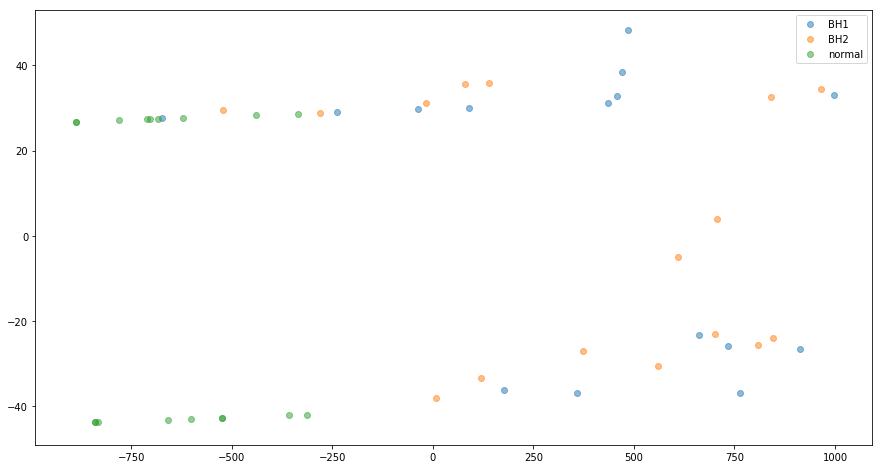

In [301]:
labels = stats['label'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.5)
    plt.legend()

Example adding also the 16 nodes, clearly the accuracy goes down as we dont have many data

In [382]:
dataList=coojaJsonImporter("../cooja-16nodes/traces/")

data=[]
cases=[
    "1BH",
       "1BH","1BH","Norm"]
"""
Importing test_1BH_P8_16nodes_2002019-01-29_21_40_55.json
Importing test_1BH_16nodes2018-11-09_19_46_22.json
Importing test_1BH_P8_16nodes_2002019-01-29_23_27_48.json
Importing test_norm_16nodes_5002019-01-29_18_56_03.json
Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json
"""



BlackHole=[-1,4,5+8,-1]
#cases=["1BH","1BH","Norm"]
for nodeList in dataList:
    data.append(createNodes(nodeList))
#dataList=coojaJsonImporter("../cooja-9nodes/traces/")
#for nodeList in dataList:
#    data.append(createNodes(nodeList))
    
d={ "label":[],
    "count":[],
    "std":  [],
    "mean": [],
    "var":  [],
    "25%":  [],
    "50%":[],
    "75%":[],
   "min":[],
   "max":[],
   "hop":[],
   "missing":[]
   #"rtt/pkt":[]
}

window=10
for i in range(len(data)):
    for j in range(len(data[i])):
        n=len(data[i][j].pkts["rtt"])
        #print(n)
        for z in range(0,n,window):
            #print(z)
            
            #df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
            node=data[i][j].pkts
            name=str(j)+" "+cases[i]
            nodeWindow=node[(node["pkt"]<z+window) & (node["pkt"]>=z)]["rtt"]
            #current=data[i][j].pkts['rtt'][z:z+window]
            #print(nodeWindow.shape)
            d["count"].append(nodeWindow.count())
            d["std"].append(nodeWindow.std())
            d["mean"].append(nodeWindow.mean())
            d["var"].append(nodeWindow.var())
            d["label"].append(cases[i])
            #print(nodeWindow.describe()["25%"])
            d["25%"].append(nodeWindow.describe()["25%"])
            d["50%"].append(nodeWindow.describe()["50%"])
            d["75%"].append(nodeWindow.describe()["75%"])
            d["min"].append(nodeWindow.describe()["min"])
            d["max"].append(nodeWindow.describe()["max"])
            d["hop"].append(data[i][j].hop)
            
            missing=window-nodeWindow.count()
            d["missing"].append(missing)

stats=pd.DataFrame(d)
stats=stats.dropna()
data=stats.drop(["label","25%","75%","50%","min","max","mean","var"],axis=1)
print(data.shape)

print(data.shape)
print(data.columns)
correction=[]
correction2=[] #for 3 cluster 0:normal net 1:bh net 2:bh
for i in range(len(stats["label"])):
    el=d["label"][i]
    if el=="1BH":
        correction.append(1)
        correction2.append(1)
        
    else:
        #print(el=="BH2" and i==BlackHole[2])
        correction.append(0)
        if ((el=="BH1" and i==BlackHole[1]) or
            (el=="BH2" and i==BlackHole[2])):
            
            correction2.append(2)
        else:
            correction2.append(0)
        

correction=np.array(correction)
correction2=np.array(correction2)


kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_


print(labels)

print(correction)

# Performance Metrics
accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(accuracy)
print(confusionMatrix)



Importing test_1BH_P8_16nodes_2002019-01-29_21_40_55.json
Importing test_1BH_16nodes2018-11-09_19_46_22.json
Importing test_1BH_P8_16nodes_2002019-01-29_23_27_48.json
Importing test_norm_16nodes_5002019-01-29_18_56_03.json
(770, 4)
(770, 4)
Index(['count', 'std', 'hop', 'missing'], dtype='object')
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0

In [381]:
stats.head()


776


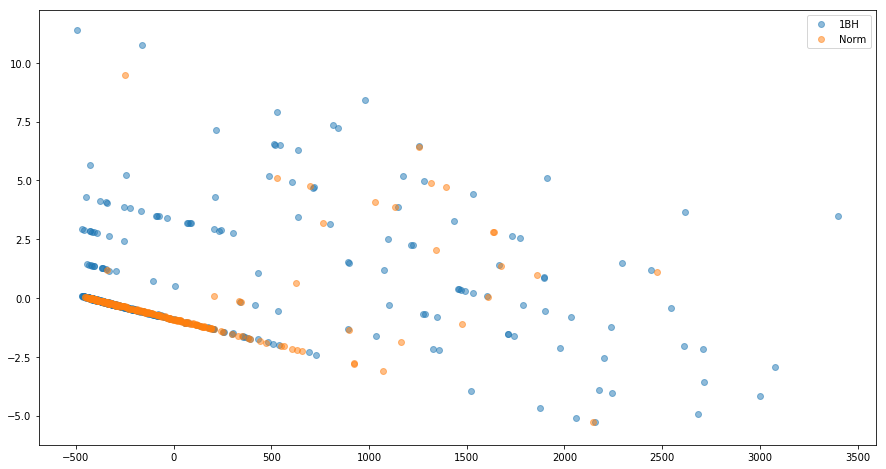

In [383]:
X = data
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()
labels = stats['label'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.5)
    plt.legend()